# Wooly Transactions Analysis

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [9]:
# Load the dataset
file_path = 'Wooly_Transactions-formatted.csv'
data = pd.read_csv(file_path)


In [10]:
# Basic summary statistics and checking for missing values
summary_stats = data.describe(include='all')
missing_values = data.isnull().sum()
print(summary_stats)
print(missing_values)

            Date         Suburb                Address        Invoice Number  \
count        318            318                    318                   318   
unique        62             16                     19                    64   
top     5/9/2022  3191 Lilydale  33 Hutchinson Street   62931910657611050922   
freq          15            102                    102                    15   
mean         NaN            NaN                    NaN                   NaN   
std          NaN            NaN                    NaN                   NaN   
min          NaN            NaN                    NaN                   NaN   
25%          NaN            NaN                    NaN                   NaN   
50%          NaN            NaN                    NaN                   NaN   
75%          NaN            NaN                    NaN                   NaN   
max          NaN            NaN                    NaN                   NaN   

                       Item Description

In [11]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

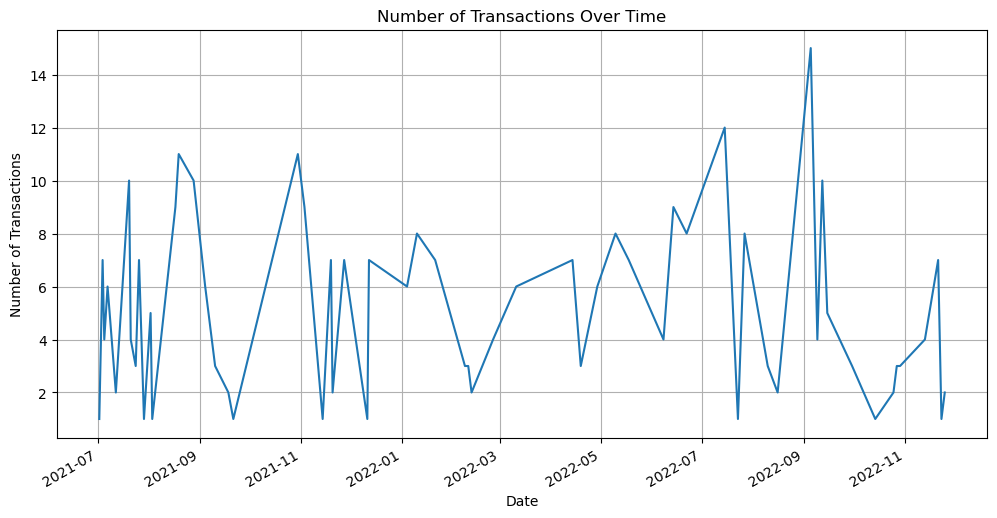

In [12]:
# Plot the number of transactions over time
transactions_over_time = data['Date'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
transactions_over_time.plot(kind='line')
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

In [13]:
# Most frequently purchased items and their prices
top_items = data['Item Description'].value_counts().head(10)
top_items_prices = data[data['Item Description'].isin(top_items.index)][['Item Description', 'Item Price']]
print(top_items)
print(top_items_prices.groupby('Item Description').mean())


Item Description
Colgate MW Plax Fresh Tea 500ml        8
Cauliflower Whole                      7
Pumpkin Butternut Cut                  7
Woolworths Spring Water 1.5L Bottle    6
Pumpkin Kent Cut                       6
D Orsogna Roast Chicken 320G           5
Carrot 1kg P/P                         5
Kiwifruit Gold Imported                4
Berry Strawberry 250g P/P              4
Lean Beef Mince 500g                   4
Name: count, dtype: int64
                                     Item Price
Item Description                               
Berry Strawberry 250g P/P              3.550000
Carrot 1kg P/P                         2.060000
Cauliflower Whole                      2.985714
Colgate MW Plax Fresh Tea 500ml        4.943750
D Orsogna Roast Chicken 320G           5.500000
Kiwifruit Gold Imported                5.230000
Lean Beef Mince 500g                   9.375000
Pumpkin Butternut Cut                  2.392857
Pumpkin Kent Cut                       2.731667
Woolworths Spring W

In [14]:
# Transactions by suburb and address
transactions_by_suburb = data['Suburb'].value_counts()
transactions_by_address = data['Address'].value_counts()
print(transactions_by_suburb)
print(transactions_by_address)

Suburb
3191 Lilydale                             102
3165 Chirnside Park                        45
3369 Kilsyth                               38
3141 Bayswater                             35
3202 Box Hill                              23
3173 Vermont                               18
3216 Croydon                               12
3149 Eastland (Victoria)                   11
3155 Templestowe                            7
3969 Glen Waverly                           7
3806 Clayton                                7
3327 Blackburn South                        5
2610 Surfers Paradise Circle on Cavill      3
3130 Waverley Gardens (Mulgrave)            3
3317 Doncaster Shopping Town                1
3304 QV                                     1
Name: count, dtype: int64
Address
33 Hutchinson Street                      102
Cnr Maroondah Highway and Edwards Rd       45
659 Mountain Highway                       27
Cnr Mt Dandenong Road and Russo Place      24
Cnr Main and Station Streets           

In [15]:
# Drop rows with missing 'Item Price'
data_ml = data.dropna(subset=['Item Price'])

In [16]:
# Extracting additional features from the Date column
data_ml['Day'] = data_ml['Date'].dt.day
data_ml['Month'] = data_ml['Date'].dt.month
data_ml['Year'] = data_ml['Date'].dt.year

In [17]:
# Encode categorical variables
le = LabelEncoder()
data_ml['Suburb'] = le.fit_transform(data_ml['Suburb'])
data_ml['Address'] = le.fit_transform(data_ml['Address'])
data_ml['Item Description'] = le.fit_transform(data_ml['Item Description'])

In [18]:
# Define features and target variable
features_extended = ['Suburb', 'Address', 'Item Description', 'Day', 'Month', 'Year']
X = data_ml[features_extended]
y = data_ml['Item Price']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

In [22]:
# Train and evaluate models
model_performance = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    model_performance.append({'Model': name, 'MAE': mae})

model_performance_df = pd.DataFrame(model_performance)
print(model_performance_df)

                         Model       MAE
0            Linear Regression  3.241000
1      Decision Tree Regressor  2.538437
2      Random Forest Regressor  2.935446
3  Gradient Boosting Regressor  2.848164


In [23]:
# Clustering Transactions
# Prepare the data for clustering
X_clustering = data_ml[['Item Description', 'Suburb', 'Address', 'Day', 'Month', 'Year']]
X_clustering_scaled = scaler.fit_transform(X_clustering)

In [24]:
# Perform PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering_scaled)

In [25]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
# Add cluster labels to the original data
data_ml['Cluster'] = clusters

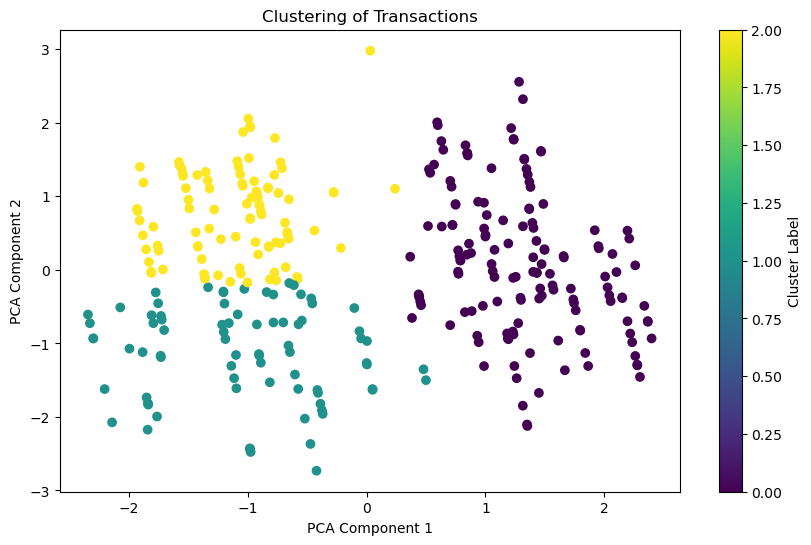

In [27]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Clustering of Transactions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [28]:
# Display the first few rows of the clustered dataset
print(data_ml[['Item Description', 'Suburb', 'Address', 'Cluster']].head())

   Item Description  Suburb  Address  Cluster
0               224       3        2        2
1               207       8       11        2
2                46       8       11        0
3               113       8       11        0
4                51       8       11        0
